# Hands-on 02: Caracterização de canal banda estreita (modelagem e caracterização do desvanecimento de pequena escala)

* Aluno: Lucas Ismael Campos Medeiros

## Entrega 1:

* Plotar no mesmo gráfico as curvas: potência recebida completa (sujeita ao desvanecimento de larga e pequena escalas) vs distância; potência recebida somente sujeita ao path loss estimado vs distância; potência recebida somente sujeita ao path loss e ao sombreamento estimados vs distância. Identificar as linhas por legendas e cores diferentes. A curvas devem ser feitas em função da distância percorrida na medição. **Use W = 5**. 

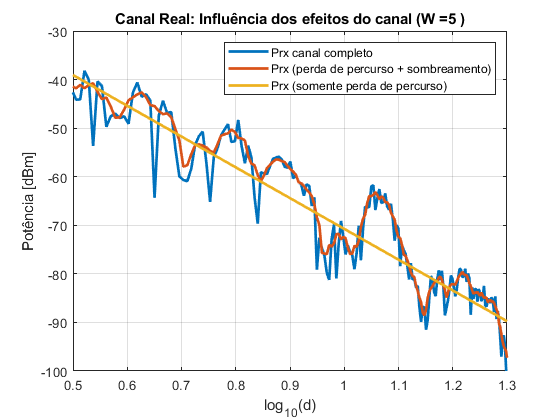

In [5]:
clear all;clc;
% Carregando o canal real
load('Prx_Real_2021_1.mat')
vtPrxdBm = dPrx;
vtDist = dPath;
% Tamanho da janela
dW = 5;
% Transforma potência em mWatts
vtPtrxmW = 10.^(vtPrxdBm/10);
nSamples = length(vtPtrxmW);
% Vetores para canal estimado
vtDesLarga = [];
vtDesPequeEst = [];
%
% Cálculo do desvanecimenro lento e rápido
dMeiaJanela = round((dW-1)/2);  % Meia janela
ij = 1;
for ik = dMeiaJanela + 1 : nSamples - dMeiaJanela
    % Desvanecimento de larga escala: perda de percurso + sombreamento [dB]
    vtDesLarga(ij) = 10*log10(mean(vtPtrxmW(ik-dMeiaJanela:ik+dMeiaJanela)));
    % Desvanecimento de pequena escala [dB]
    vtDesPequeEst(ij) = vtPrxdBm(ik)-vtDesLarga(ij);
    ij = ij + 1;
end
%
% Cálculo da envoltória normalizada (para efeitos de cálculo do fading)
indexes = dMeiaJanela+1 : nSamples-dMeiaJanela;
%vtPrxW = ((10.^(vtPrxdBm(indexes)./10))/1000);
vtPtrxmWNew = 10.^(vtPrxdBm(indexes)/10);
desLarga_Lin = (10.^(vtDesLarga(1:length(indexes))./10));
envNormal = sqrt(vtPtrxmWNew)./sqrt(desLarga_Lin);
%
% Ajuste no tamanho dos vetores devido a filtragem
vtDistEst = vtDist( dMeiaJanela+1 : nSamples-dMeiaJanela );
vtPrxdBm = vtPrxdBm( dMeiaJanela+1 : nSamples-dMeiaJanela );
%
% Cálculo reta de perda de percurso
vtDistLog = log10(vtDist);
vtDistLogEst = log10(vtDistEst);
% Cálculo do coeficientes da reta que melhor se caracteriza a perda de percurso
dCoefReta = polyfit(vtDistLogEst,vtPrxdBm,1); 
% Expoente de perda de percurso estimado
dNEst = -dCoefReta(1)/10;
%disp(['Estimação dos parâmetros de larga escala (W = ' num2str(dW) '):'])
%disp(['   Expoente de perda de percurso estimado n = ' num2str(dNEst)]);
% Perda de percurso estimada para os pontos de medição
vtPathLossEst = polyval(dCoefReta,vtDistLogEst);
% Sombreamento
vtShadCorrEst = vtDesLarga - vtPathLossEst';
% Calcula a variância do sombreamento estimado
stdShad = std(vtShadCorrEst);
meanShad = mean(vtShadCorrEst);
%disp(['   Desvio padrão do sombreamento estimado = ' num2str(stdShad)]);
%disp(['   Média do sombreamento estimado = ' num2str(meanShad)]);
vtPathLossEst = - vtPathLossEst;
%Full Signal
plot(vtDistLogEst,vtPrxdBm, '-','linewidth',2);hold on;
%Pathloss + Shadowing
vtwoFading = vtPrxdBm-vtDesPequeEst';
plot(vtDistLogEst,vtwoFading, '-','linewidth',2);
%Pathloss only
vtwoFadingShad = vtPrxdBm-vtDesPequeEst'-vtShadCorrEst';
plot(vtDistLogEst,vtwoFadingShad,'-','linewidth',2);
%Plot configs
title("Canal Real: Influência dos efeitos do canal (W =" + dW +" )");
xlabel('log_{10}(d)');
ylabel('Potência [dBm]');
legend('Prx canal completo', 'Prx (perda de percurso + sombreamento)','Prx (somente perda de percurso)');
axis([0.5 1.3 -100 -30]);
grid;

## Entregas 2 e 3:

* Fazer a estimativa para os seguintes valores da janela **W = 2, 5, 10**;
* Mostre qual é a melhor distribuição (e seus parâmetros) para cada janela de filtragem simulada.

In [111]:
clear all;clc;
% Carregando o canal real
load('Prx_Real_2021_1.mat')
vtPrxdBm = dPrx;
vtDist = dPath;
% Tamanho da janela
vtW = [2 5 10];
for dW = 1:length(vtW)
    % Transforma potência em mWatts
    vtPtrxmW = 10.^(vtPrxdBm/10);
    nSamples = length(vtPtrxmW);
    % Vetores para canal estimado
    vtDesLarga = [];
    vtDesPequeEst = [];
    %
    % Cálculo do desvanecimenro lento e rápido
    dMeiaJanela = round((vtW(dW)-1)/2);  % Meia janela
    ij = 1;
    for ik = dMeiaJanela + 1 : nSamples - dMeiaJanela
        % Desvanecimento de larga escala: perda de percurso + sombreamento [dB]
        vtDesLarga(ij) = 10*log10(mean(vtPtrxmW(ik-dMeiaJanela:ik+dMeiaJanela)));
        % Desvanecimento de pequena escala [dB]
        vtDesPequeEst(ij) = vtPrxdBm(ik)-vtDesLarga(ij);
        ij = ij + 1;
    end
    %
    % Cálculo da envoltória normalizada (para efeitos de cálculo do fading)
    indexes = dMeiaJanela+1 : nSamples-dMeiaJanela;
    %vtPrxW = ((10.^(vtPrxdBm(indexes)./10))/1000);
    vtPtrxmWNew = 10.^(vtPrxdBm(indexes)/10);
    desLarga_Lin = (10.^(vtDesLarga(1:length(indexes))./10));
    envNormal = sqrt(vtPtrxmWNew')./sqrt(desLarga_Lin);
    %
    % Ajuste no tamanho dos vetores devido a filtragem
    vtDistEst = vtDist( dMeiaJanela+1 : nSamples-dMeiaJanela );
    vtPrxdBm = vtPrxdBm( dMeiaJanela+1 : nSamples-dMeiaJanela );
    %
    % Cálculo reta de perda de percurso
    vtDistLog = log10(vtDist);
    vtDistLogEst = log10(vtDistEst);
    % Cálculo do coeficientes da reta que melhor se caracteriza a perda de percurso
    dCoefReta = polyfit(vtDistLogEst,vtPrxdBm,1); 
    % Expoente de perda de percurso estimado
    dNEst = -dCoefReta(1)/10;
    % Perda de percurso estimada para os pontos de medição
    vtPathLossEst = polyval(dCoefReta,vtDistLogEst);
    % Sombreamento
    vtShadCorrEst = vtDesLarga - vtPathLossEst';
    % Calcula a variância do sombreamento estimado
    stdShad = std(vtShadCorrEst);
    meanShad = mean(vtShadCorrEst);

    fitWindow = fitmethis([envNormal],'figure','off','output','off');
    fprintf('-------------------------------------------------------------------------------------\n')
    fprintf('-------------------------------------Estimativas-------------------------------------\n')
    fprintf('\n \tJanela\tn\t\tDesvio-Padrão\tMédia\n')
    fprintf('\t%d \t%f \t%f \t%f\n',vtW(dW), dNEst, stdShad, meanShad)
    fprintf('-----------------------------------Melhores PDFs-------------------------------------\n')
    fprintf('\n \tPDFs\t\tName\t\tLogL\n')
    fprintf('\t%-10s \t%-10s \t%-10.3e\n',"Primeira",fitWindow(1).name,fitWindow(1).LL)
    fprintf('\t%-10s \t%-10s \t%-10.3e\n',"Segunda",fitWindow(2).name,fitWindow(2).LL)
    %fprintf('-------------------------------------------------------------------------------------\n')
end


-------------------------------------------------------------------------------------
-------------------------------------Estimativas-------------------------------------

 	Janela	n		Desvio-Padrão	Média
	2 	6.352221 	4.989336 	0.717360
-----------------------------------Melhores PDFs-------------------------------------

 	PDFs		Name		LogL
	Primeira   	ev         	3.121e+01 
	Segunda    	gev        	2.820e+01 
-------------------------------------------------------------------------------------
-------------------------------------Estimativas-------------------------------------

 	Janela	n		Desvio-Padrão	Média
	5 	6.297921 	4.581686 	0.892783
-----------------------------------Melhores PDFs-------------------------------------

 	PDFs		Name		LogL
	Primeira   	gev        	-1.638e+01
	Segunda    	weibull    	-1.720e+01
-------------------------------------------------------------------------------------
-------------------------------------Estimativas----------------------------------

------------------